## Generador aleatorio a partir de los primeros 1000 dígitos de pi
#### Integrantes:
- Jaime Mendoza
- Juan Javier Miño
- Felipe Robalino
- Oscar Albuja

In [1]:
import numpy as np
from scipy.ndimage import uniform_filter1d
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm, trange

In [2]:
pi = """
1415926535 8979323846 2643383279 5028841971 6939937510 5820974944 
5923078164 0628620899 8628034825 3421170679 8214808651 3282306647 
0938446095 5058223172 5359408128 4811174502 8410270193 8521105559 
6446229489 5493038196 4428810975 6659334461 2847564823 3786783165 
2712019091 4564856692 3460348610 4543266482 1339360726 0249141273 
7245870066 0631558817 4881520920 9628292540 9171536436 7892590360 
0113305305 4882046652 1384146951 9415116094 3305727036 5759591953 
0921861173 8193261179 3105118548 0744623799 6274956735 1885752724 
8912279381 8301194912 9833673362 4406566430 8602139494 6395224737 
1907021798 6094370277 0539217176 2931767523 8467481846 7669405132 
0005681271 4526356082 7785771342 7577896091 7363717872 1468440901 
2249534301 4654958537 1050792279 6892589235 4201995611 2129021960 
8640344181 5981362977 4771309960 5187072113 4999999837 2978049951 
0597317328 1609631859 5024459455 3469083026 4252230825 3344685035 
2619311881 7101000313 7838752886 5875332083 8142061717 7669147303 
5982534904 2875546873 1159562863 8823537875 9375195778 1857780532 
1712268066 1300192787 6611195909 2164201989
"""
pi = pi.replace(" ","").replace("\n","")
# Muestra la distribucion de digitos de los primetos 10000 de pi
pi_np = np.array(list(pi))
#

In [3]:
# Obtiene una seed aleatoria de pi
def get_seed(pi_digits, seed_length):
    start = np.random.randint(0, len(pi_digits))
    if start + seed_length > len(pi_digits):
        seed = pi_digits[start:] + pi_digits[:start+seed_length-len(pi_digits)]
    else:
        seed = pi_digits[start:start+seed_length]
    return seed

# Con la seed anterior, obtiene una secuencia de 3 en 11
def get_secuence(seed):
    seed_s = seed*3
    secuences = []
    for s in range(0, len(seed_s), 3):
        secuences.append(seed_s[s:s+3])
    return np.array(secuences)

# genera el numero aleatorio
def get_random_num(secuences):
    num_list = [pi[int(x)] for x in secuences]
    num = (''.join(num_list))
    return num

# Obtiene los min/max de una secuencia de numeros
def repeating_ext(data, method = 'max'):
    if len(data) == 0:
        return [] , data
    
    if method == 'max':
        ext = np.where(data==np.max(data))[0]
    elif method == 'min':
        ext = np.where(data==np.min(data))[0]
    else:
        raise AttributeError('method not valid, use "max" or "min"')

    if len(ext)==1:
        return repeating_ext(data[ext[0]+1:])
    return ext, data


# Obtiene los varios puntos de medida del numero aleatorio
def get_nums(seed=None , n=400000, pi=pi, rawness='rounded'):
    if not seed:
        seed = get_seed(pi, 11)

    values= [seed]
    for _ in trange(n, desc=f'Random: {seed}'):
        values.append(str(get_random_num(get_secuence(values[-1]))))

    # numero de 0 a 1
    nums = [int(x) for x in values]
    nums1=[x/99999999999 for x in nums]

    # moving average y redondeo
    avg_data = uniform_filter1d(nums1, size=5000)
    avg_data_rounded = np.round(avg_data, 12)

    if rawness == 'rounded':
        data = avg_data_rounded
    elif rawness == 'moving_avg':
        data = avg_data
    elif rawness == 'raw':
        data = nums1
    else:
        raise AttributeError('rawness not valid, use "rounded" or "moving_avg"')

    return seed, data

def random_data(data):
    data = np.array(data)
    data = data*10
    data = data.astype(int)
    return data

    

In [4]:
data = get_nums(seed='81950790833',n=5, rawness='raw')[1]
print("Primeros 5 numeros con el seed 81950790833")
data

Random: 81950790833:   0%|          | 0/5 [00:00<?, ?it/s]

Primeros 5 numeros con el seed 81950790833


[0.8195079083381951,
 0.6304398311463044,
 0.7938896491379389,
 0.9721773252597218,
 0.05226861483052268,
 0.21330227482213301]

Random: 03600113305:   0%|          | 0/10000 [00:00<?, ?it/s]

<BarContainer object of 10 artists>

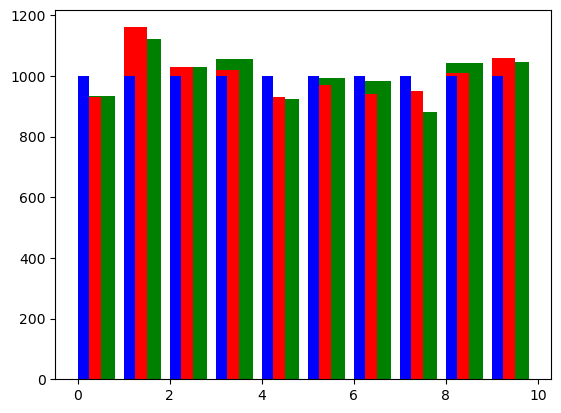

In [5]:
data = get_nums(n=10000, rawness='raw')[1]
pi_unique = np.unique(pi_np, return_counts=True)[1]*10
plt.bar(*np.unique(random_data(data), return_counts=True), color='g', align='edge' )
plt.bar(np.arange(10),pi_unique, width=0.5, color='r', align='edge')
plt.bar(np.arange(10), np.array([100]*10)*10, width=0.25, color='b', align='edge')

# Distribucion de los numeros aleatorios

### Ciclo de generacion
    Luego de obtener varias secuencias de numeros aleatorios, para obtener el ciclo de generacion se observo que ciertas seeds generan secuencias aleatorias con cliclos distintos. Para obtener el ciclo de generacion se realiza 20 diferentes secuencias y obtenemos el ciclo de generacion de cada una de ellas. 

In [6]:
results = []
for _ in trange(20):
    data = get_nums()[0:2]
    exts = {'max': repeating_ext(data[1], method='max')[0], 'min': repeating_ext(data[1], method='min')[0]}
    results.append((data[0], exts, data[1]))

  0%|          | 0/20 [00:00<?, ?it/s]

Random: 31859502445:   0%|          | 0/400000 [00:00<?, ?it/s]

Random: 83875288658:   0%|          | 0/400000 [00:00<?, ?it/s]

Random: 74771309960:   0%|          | 0/400000 [00:00<?, ?it/s]

Random: 48253421170:   0%|          | 0/400000 [00:00<?, ?it/s]

Random: 96282925409:   0%|          | 0/400000 [00:00<?, ?it/s]

Random: 61121290219:   0%|          | 0/400000 [00:00<?, ?it/s]

Random: 81284811174:   0%|          | 0/400000 [00:00<?, ?it/s]

Random: 53921717629:   0%|          | 0/400000 [00:00<?, ?it/s]

Random: 73819326117:   0%|          | 0/400000 [00:00<?, ?it/s]

Random: 95778185778:   0%|          | 0/400000 [00:00<?, ?it/s]

Random: 30548820466:   0%|          | 0/400000 [00:00<?, ?it/s]

Random: 34468503526:   0%|          | 0/400000 [00:00<?, ?it/s]

Random: 57713427577:   0%|          | 0/400000 [00:00<?, ?it/s]

Random: 05392171762:   0%|          | 0/400000 [00:00<?, ?it/s]

Random: 34861045432:   0%|          | 0/400000 [00:00<?, ?it/s]

Random: 11738193261:   0%|          | 0/400000 [00:00<?, ?it/s]

Random: 66521384146:   0%|          | 0/400000 [00:00<?, ?it/s]

Random: 61179310511:   0%|          | 0/400000 [00:00<?, ?it/s]

Random: 35261931188:   0%|          | 0/400000 [00:00<?, ?it/s]

Random: 54930381964:   0%|          | 0/400000 [00:00<?, ?it/s]

In [7]:
periodos=[]
for result in results:
    maxs = result[1]['max']
    mins = result[1]['min']
    if (any(maxs) or any(mins)):
        periodo = np.array(list(np.diff(maxs))+list(np.diff(mins))).mean()
        periodos.append((result[0],periodo))
periodos

[('31859502445', 18315.0),
 ('83875288658', 144740.0),
 ('74771309960', 144740.0),
 ('96282925409', 13040.0),
 ('61121290219', 144740.0),
 ('81284811174', 144740.0),
 ('53921717629', 28948.0),
 ('73819326117', 17340.0),
 ('95778185778', 144740.0),
 ('30548820466', 144740.0),
 ('34468503526', 18315.0),
 ('57713427577', 144740.0),
 ('34861045432', 144740.0),
 ('11738193261', 144740.0),
 ('66521384146', 144740.0),
 ('61179310511', 144740.0),
 ('35261931188', 144740.0),
 ('54930381964', 144740.0)]

<BarContainer object of 5 artists>

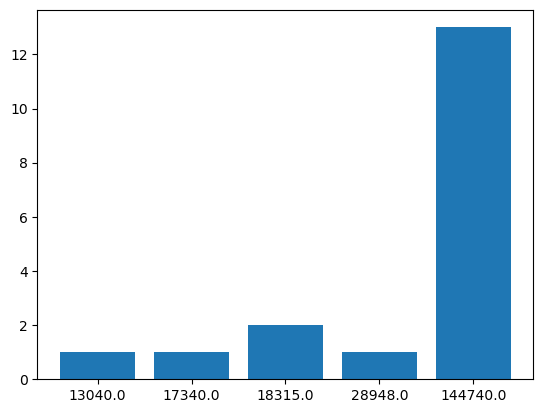

Bad pipe message: %s [b'0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7\r\nHost: localhost:46311\r\nUser-Agent: M', b'illa/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36 E']
Bad pipe message: %s [b'/113.0.1774.35\r\nAccept-Encoding: gzip, deflate, br\r\nAccept-Language: en-US,en;q=0.9\r\nCache-Control:', b'ax-age=0\r\nX-Forwarded-For: 10.2', b'.0.4\r\nReferer: https://qlz6t2tg-46311.use2.devtunne']
Bad pipe message: %s [b'.ms/\r\nX-Request-ID: fffc399319aa1b28dd02355371a827e5\r\nX-Real-IP: 10.240.0.4\r\nX-Forwarded-Proto: https\r\nX-Fo', b'arded-Host: qlz6t2tg-46311.use2.devtunnels.ms\r\nX-Forwarded-Port: 443\r\nX-Forwarded-Scheme: https\r\nX-Original-URI: ', b'\nX-Scheme: https\r\nsec-ch-ua: "Microsoft Edge";', b'"113", "Chromium";v="113", "Not-A.Brand";v="24"\r\nsec-ch-ua-mobile: ?0\r\nsec-ch-ua-platform: "Windows"\r\nsec-fetch-site:', b'ame-origin\r\nsec-fetch-mode: nav', b'ate\r\nsec-fetch-user: ?1\

In [9]:
ciclos = [x[1] for x in periodos]
ciclos_uniq, ciclos_r= np.unique(ciclos, return_counts=True)
ciclos_uniq = np.array(ciclos_uniq, dtype=str)
plt.bar(ciclos_uniq, ciclos_r)

## Conclusion
    Se puede concluir que el generador de numeros aleatorios basado en los primeros 1000 digitos de pi no es muy bueno:
        1. La distribucion de los numeros no es uniforme.
        2. El ciclo de generacion es inconsistente y depende mucho de su seed.
    Además, por cuestiones de simplificacion, se determina el cliclo como 144740, ya que este fue el más común a lo largo de la simulación.
## Recomendacion
    Se recomienda investigar un poco mas a fondo la inconsistencia del generador cuando al ciclo que refiere.